In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout, Input
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#!pip install tensorflow


In [2]:
df = pd.read_csv('datasets\\heart_new.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x = df.iloc[:,:13].values
y = df.iloc[:,13].values

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [7]:
x_train.shape


(227, 13)

In [10]:
# model = Sequential()
# model.add(Input)
# model.add(Dense(6))
# model.add(Activation('relu'))

# model.add(Dense(8))
# model.add(Activation('relu'))

# model.add(Flatten())

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

model = Sequential([
    Input(shape=(13,)),
    Dense(6, activation='relu'),  # Input layer with 64 neurons and ReLU activation
    Dense(8, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Flatten(),
    Dense(1, activation='sigmoid')  # Output layer with 10 neurons (for classification) and softmax activation
])

In [11]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

print('<< Compiling Model >>')


<< Compiling Model >>


In [12]:
model.build()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

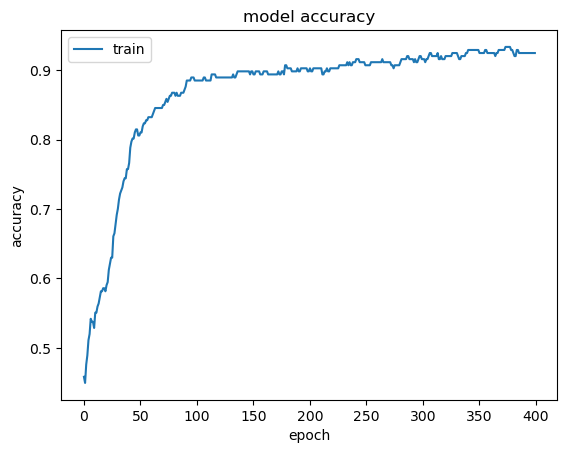

In [14]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 100) #INCRESE IT ACCORDING TO USE!

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [15]:
y_pred_1 = model.predict(x_test)
y_pred = (y_pred_1 > 0.5)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

acc = 100*accuracy_score(y_test,y_pred)
print('percentage Accuracy : ',acc)

[[27  6]
 [ 4 39]]
0.868421052631579
percentage Accuracy :  86.8421052631579


In [16]:
#extracting features 

In [18]:
ann_feature_model = Model(inputs=model.inputs, outputs = model.layers[-3].output)
ann_feature_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140 (560.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
ann_feature_model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


In [20]:
ann_features = ann_feature_model.predict(x_train,verbose=True)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [21]:
ann_features.shape

(227, 8)

In [29]:
x_train.shape,x_test.shape

((227, 13), (76, 13))

In [22]:
from keras.models import load_model
ann_feature_model.save('ann_feature_model.h5')



In [26]:
loaded = load_model('ann_feature_model.h5')

In [27]:
loaded.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142 (572.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)